# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Week2/insurance.csv")

In [4]:
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0

df.loc[df['smoker'] == 'yes','smoker'] = 1
df.loc[df['smoker'] == 'no','smoker'] = 0

df['region1'] = df['region']
df.loc[df['region1'] == 'southwest', 'region1'] = 1
df.loc[df['region1'] == 'northwest', 'region1'] = 0
df.loc[df['region1'] == 'southeast', 'region1'] = 0
df.loc[df['region1'] == 'northeast', 'region1'] = 0

df['region2'] = df['region']
df.loc[df['region2'] == 'southwest', 'region2'] = 0
df.loc[df['region2'] == 'northwest', 'region2'] = 1
df.loc[df['region2'] == 'southeast', 'region2'] = 0
df.loc[df['region2'] == 'northeast', 'region2'] = 0

df['region3'] = df['region']
df.loc[df['region3'] == 'southwest', 'region3'] = 0
df.loc[df['region3'] == 'northwest', 'region3'] = 0
df.loc[df['region3'] == 'southeast', 'region3'] = 1
df.loc[df['region3'] == 'northeast', 'region3'] = 0

df['region4'] = df['region']
df.loc[df['region4'] == 'southwest', 'region4'] = 0
df.loc[df['region4'] == 'northwest', 'region4'] = 0
df.loc[df['region4'] == 'southeast', 'region4'] = 0
df.loc[df['region4'] == 'northeast', 'region4'] = 1

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region1,region2,region3,region4
0,19,1,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0


# 2.) Split the data into 80/20, in/out sample

In [8]:
import numpy as np

In [9]:
df_subset = df[["age", "sex", "bmi", "children", "smoker", "region1", "region2","region3"]]
data = np.array(df_subset)
target = np.array(df.iloc[:,-5:-4])

In [10]:
data

array([[19, 1, 27.9, ..., 1, 0, 0],
       [18, 0, 33.77, ..., 0, 0, 1],
       [28, 0, 33.0, ..., 0, 0, 1],
       ...,
       [18, 1, 36.85, ..., 0, 0, 1],
       [21, 1, 25.8, ..., 1, 0, 0],
       [61, 1, 29.07, ..., 0, 1, 0]], dtype=object)

In [11]:
target

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [12]:
cut = int((len(data) * .8) // 1)

In [13]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [14]:
from sklearn import preprocessing

In [15]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [16]:
# Import LassoCV

In [17]:
from sklearn.linear_model import LassoCV

In [18]:
modCV = LassoCV().fit(in_data_scale, in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
a = modCV.alpha_

In [20]:
a

115.9799859390741

# 5.) Run a lasso regression with that Lambda

In [21]:
# Use Lasso

In [22]:
from sklearn.linear_model import Lasso

In [23]:
model1=Lasso().fit(in_data_scale,in_target)
model1.predict(np.array(in_data_scale))
model1.coef_

array([3667.23674336,  125.72759357, 2061.4066164 ,  522.31024754,
       9476.78330134, -531.17387864, -197.70207781, -496.05520921])

# 6.) Visualize the coefficients 

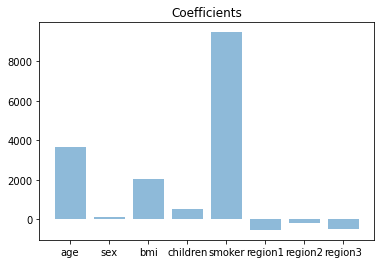

In [24]:
objects = ('age', 'sex', 'bmi', 'children', 'smoker', 'region1', 'region2','region3')
y_axis = range(len(objects))
plt.bar(y_axis, model1.coef_, align='center', alpha = 0.5)
plt.xticks(y_axis, objects)
plt.title('Coefficients')
plt.show()

# 7.) Interpret the coefficients

In [ ]:
#(1)Age has significant influence on the health insurance fee, older people tend to spend more on health insurance fee.
#(2)Male tend to spend a little bit more on health insurance, generally gender doesn't have significant impact on insurance spending.
#(3)BMI has a significant impact on medical insurance expenditures. People with higher BMI indicators have more medical expenses.
#(4)Children have a significant impact on health insurance spending, with people with more children spending more on health care.
#(5)People with a smoking habit spend a lot of money on health insurance.
#(6)People in the Southwest spend a lot of money on health insurance.

# 8.) Compare in and out of sample MSE’s

In [25]:
in_y_pred = model1.predict(np.array(in_data_scale))
out_y_pred = model1.predict(np.array(out_data_scale))

In [26]:
from sklearn.metrics import mean_squared_error 
out_sample_mse = mean_squared_error(out_y_pred, out_target) 
in_sample_mse = mean_squared_error(in_y_pred, in_target)

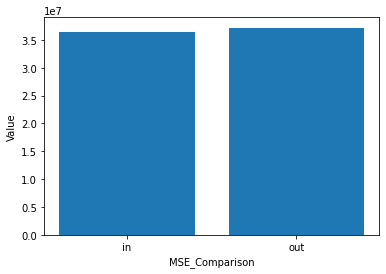

In [27]:
plt.bar(['in', 'out'], [in_sample_mse, out_sample_mse])
plt.xlabel('MSE_Comparison')
plt.ylabel('Value')
plt.show()